In [5]:
%matplotlib notebook

import torch;
import torchvision;
import numpy as np;
import matplotlib.pyplot as plt;
from synthetic_data import generate_lorenz_data, SyntheticCalciumVideoDataset
from matplotlib.animation import FuncAnimation

In [6]:
data_dict = generate_lorenz_data(20, 65, 50, 100, save=False)
cells = data_dict['cells']
traces = data_dict['train_fluor']
train_ds = SyntheticCalciumVideoDataset(traces=traces, cells=cells)

Generating Lorenz data
Converting to rates and spikes
Converting to fluorescence
Train and test split
Saving to .//synth_data/lorenz_100
Saving variable with name:  valid_data
Saving variable with name:  train_latent
Saving variable with name:  train_data
Saving variable with name:  train_oasis
Saving variable with name:  train_fluor
Saving variable with name:  train_spikes
Saving variable with name:  train_calcium
Saving variable with name:  valid_rates
Saving variable with name:  loading_weights
Saving variable with name:  cell_loc
Saving variable with name:  valid_truth
Saving variable with name:  train_truth
Saving variable with name:  valid_spikes
Saving variable with name:  conversion_factor
Saving variable with name:  valid_oasis
Saving variable with name:  dt
Saving variable with name:  cells
Saving variable with name:  valid_fluor
Saving variable with name:  valid_latent
Saving variable with name:  train_rates
Saving variable with name:  valid_calcium


<IPython.core.display.Javascript object>


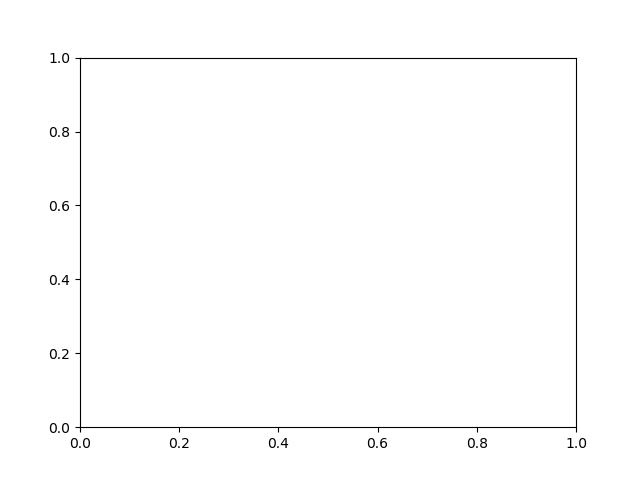

In [13]:
class data_to_video(object):
    def __init__(self, ax, data):
        self.data = data
        self.ax = ax
        
    def init(self):
        return self.ax.imshow(data[0])
    def __call__(self, i):
        if i == 0:
            return self.init()
        else:
            return self.ax.imshow(data[i])
        
fig, ax = plt.subplots()
V = data_to_video(ax, train_ds[0])
anim = FuncAnimation(fig, V, frames = np.arange(V.data.shape[0]), init_func=V.init, interval=100, blit=100)
plt.show()

<IPython.core.display.Javascript object>


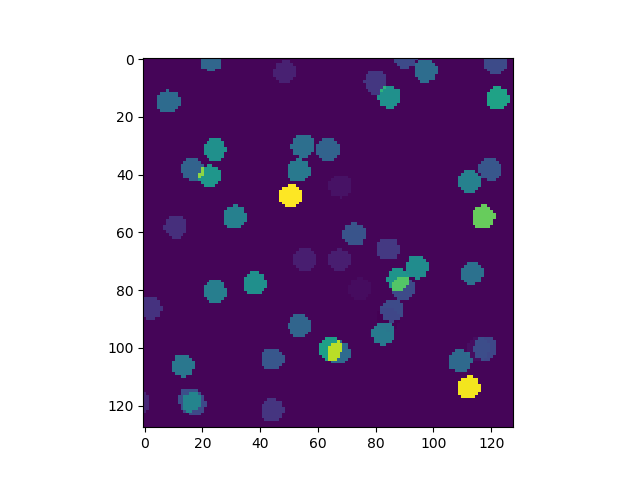

In [19]:
from matplotlib.animation import ArtistAnimation
fig, ax = plt.subplots()

ims = []
    
for t in range(len(train_ds[0])):
    im = plt.imshow(train_ds[0][t], animated=True)
    ims.append([im])
    
    
ani = ArtistAnimation(fig, ims, interval=50, blit=True,
                      repeat_delay=1000)